In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer , add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [2]:
configdic=importer('Development_config.ini')
variable_importer(configdic,True,accuracy_number=500,accuracy=0.08)
configdic1,paras=add_sellersparameters(configdic,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
controldata=controlrun(configdic)
variable_importer(configdic,False)
eq=configdic1['eqparam']
rk=configdic1['rk4input']
fun=configdic1['funccomp']
Vars.T=controldata[1][-1]
print(Vars.T)
Vars.T_global=controldata[2][-1]
Vars.t=controldata[0][-1]
outputdata=rk4alg(model_equation,eq,fun)
out=[]
for l in outputdata:
    out.append(np.array(l))
    

Loading Configuration from: Development_config.ini
Starting controlrun with a temperature accuracy of 0.08 K on the GMT over 500 datapoints.
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Transit State within 12.482066631317139 seconds
Simulation finished within 12.493016958236694 seconds
Finished controlrun over 27.394520547945206 years. Runtime: 12.541697263717651 s
[128.17350259 128.17306632 128.17211996 128.171429   128.17064967
 128.16970987 128.16901154 128.16876116 128.16863987 128.1685669
 128.16845073 128.167368   128.16442951 128.16037127 128.1572812
 128.15444262 128.1519127  128.15068244]
Starting simulation...


Simulation finished within 4.24203896522522 seconds


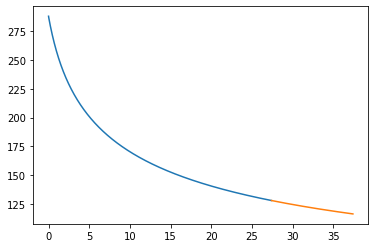

In [3]:
plt.plot(np.array(controldata[0])/(60*60*24*365),np.array(controldata[1])[:,9])
plt.plot(out[0]/(60*60*24*365),out[1][:,9])#[:,0])
#plt.ylim(-1,1)
#print(out[1][:,1])

In [4]:
#configCTRL=importer('Testing_AOD.ini')
#variable_importer(configCTRL,False)
#CTRL=np.array(controlrun(configCTRL))
configCTRL1=importer('Testing_RF.ini')
variable_importer(configCTRL1,False)
CTRL=rk4alg(model_equation,configCTRL1['eqparam'],configCTRL1['funccomp'])
#print(Vars.AOD)

Loading Configuration from: Testing_RF.ini
0D
Starting simulation...


Simulation finished within 5.78976583480835 seconds


In [5]:
configSBFCTRL=importer('../../Simulations/Config/1D/Controls/TSI_Steinhilber_850_1850_CTRL.ini')
variable_importer(configSBFCTRL,False)#,accuracy_number=2000,accuracy=1e-4)
configSBFCTRL,ParasCTRL=add_sellersparameters(configSBFCTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
SBF_CTRL=controlrun(configSBFCTRL)

Loading Configuration from: ../../Simulations/Config/1D/Controls/TSI_Steinhilber_850_1850_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 35.55293893814087 seconds
Finished controlrun over 60.0 years. Runtime: 35.55419659614563 s


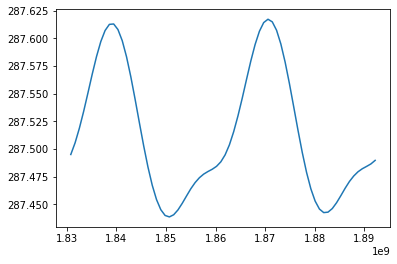

In [6]:
plt.plot(SBF_CTRL[0][-72:],SBF_CTRL[2][-72:])

In [ ]:
configTSI_SBF=importer('TSI_Steinhilber_850_1850.ini')
variable_importer(configTSI_SBF,False)#,accuracy_number=2000,accuracy=1e-4)
configTSI_SBF,ParasTSI_SBF=add_sellersparameters(configTSI_SBF,parameterinterpolatorstepwise,'SellersParameterization.ini',2,3,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=SBF_CTRL[1][-1],SBF_CTRL[2][-1]
TSI_SBF=rk4alg(model_equation,configTSI_SBF['eqparam'],configTSI_SBF['funccomp'])

Loading Configuration from: TSI_Steinhilber_850_1850.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


In [22]:
zero=np.mean(SBF_CTRL[2][-36:])
plt.plot(TSI_SBF[0],TSI_SBF[2]-zero)
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer
plt.plot(TSI_SBF[0],moving_average(TSI_SBF[2]-zero, 36))